<h1>Gradient Descent</h1>
<h2>Dependencies</h2>

In [1]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

<h2>Function f(x,y)</h2>

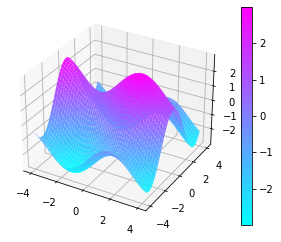

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

def f(x, y):
    return np.sin(x) + 2*np.cos(y)

res = 100

x = np.linspace(-4, 4, res)
y = np.linspace(-4, 4, res)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)
    
surf = ax.plot_surface(X,Y,Z, cmap=cm.cool)
fig.colorbar(surf)

<h2>Gradient</h2>
<h3>Gradient D. finds local minimum</h3>

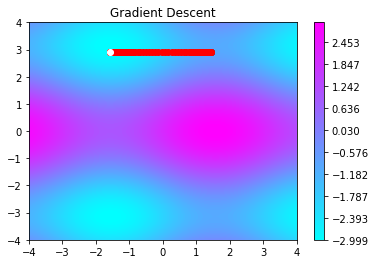

In [37]:
level_map = np.linspace(np.min(Z), np.max(Z), res)
plt.contourf(X,Y,Z, levels=level_map, cmap=cm.cool)
plt.colorbar()
plt.title("Gradient Descent")

#max axis = 4
#random point
p = np.random.rand(2) * 8 - 4
plt.plot(p[0],p[1],'o', c='k')

h = 0.01
#learning rate
lr = 0.01

#partial derivate
def derivate(cp, p):
    return (f(cp[0], cp[1]) - f(p[0], p[1])) / h

def gradient(p):
    grad = np.zeros(2)
    for idx, val in enumerate(p):
        cp = np.copy(p)
        cp[idx] = cp[idx] + h
        
        dp = derivate(cp, p)
        grad[idx] = dp
        
        return grad
    
for i in range(10000):
    p = p - lr*gradient(p)
    #plots each 10 times
    if(i % 10 == 0):
        plt.plot(p[0],p[1],'o', c='r')
        
plt.plot(p[0],p[1],'o', c='w')        